In [75]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statistics 
import datetime as dt
import numpy as np
import datetime
import math


In [76]:
def load(file):
    df = pd.read_csv(file)
    return df
dataFrame = load('owid-covid-data.csv')
dataFrame


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24438,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24439,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24440,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24441,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
dataFrame
dataFrame.drop(dataFrame[dataFrame.location == "International"].index, inplace=True)
dataFrame.drop(dataFrame[dataFrame.location == "World"].index, inplace=True)
dataFrame = dataFrame.drop(columns=['iso_code'])
dataFrame = dataFrame.drop(columns=['continent'])
# dataFrame = dataFrame.drop(columns=['new_cases'])
# dataFrame = dataFrame.drop(columns=['new_deaths'])
dataFrame = dataFrame.drop(columns=['total_cases'])
dataFrame = dataFrame.drop(columns=['total_deaths'])

dataFrame = dataFrame.drop(columns=['total_cases_per_million'])
dataFrame = dataFrame.drop(columns=['new_deaths_per_million'])
dataFrame = dataFrame.drop(columns=['total_tests'])
dataFrame = dataFrame.drop(columns=['new_tests'])
dataFrame = dataFrame.drop(columns=['total_tests_per_thousand'])
dataFrame = dataFrame.drop(columns=['new_tests_per_thousand'])
dataFrame = dataFrame.drop(columns=['new_tests_smoothed'])
dataFrame = dataFrame.drop(columns=['tests_units'])
dataFrame = dataFrame.drop(columns=['life_expectancy'])
dataFrame = dataFrame.drop(columns=['new_cases_per_million'])
dataFrame = dataFrame.drop(columns=['new_tests_smoothed_per_thousand'])
dataFrame = dataFrame.drop(columns=['total_deaths_per_million'])



# dataFrame.insert(0, 'Days', range(1, 1 + len(dataFrame)))


In [78]:
dataFrame




,location,date,new_cases,new_deaths,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0.0,0.0,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
1,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
2,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
3,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
4,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24204,Zimbabwe,2020-06-13,11.0,0.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7
24205,Zimbabwe,2020-06-14,13.0,0.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7
24206,Zimbabwe,2020-06-15,27.0,0.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7
24207,Zimbabwe,2020-06-16,4.0,0.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7


In [79]:
dataFrame.notnull().sum()

location                      24209
date                          24209
new_cases                     23991
new_deaths                    23991
stringency_index              19463
population                    24209
population_density            23229
median_age                    21954
aged_65_older                 21645
aged_70_older                 21841
gdp_per_capita                21713
extreme_poverty               14448
cvd_death_rate                21976
diabetes_prevalence           22691
female_smokers                17660
male_smokers                  17458
handwashing_facilities         9713
hospital_beds_per_thousand    20129
dtype: int64

In [80]:
dataFrame.isnull().sum()

location                          0
date                              0
new_cases                       218
new_deaths                      218
stringency_index               4746
population                        0
population_density              980
median_age                     2255
aged_65_older                  2564
aged_70_older                  2368
gdp_per_capita                 2496
extreme_poverty                9761
cvd_death_rate                 2233
diabetes_prevalence            1518
female_smokers                 6549
male_smokers                   6751
handwashing_facilities        14496
hospital_beds_per_thousand     4080
dtype: int64

In [81]:
# len(dataFrame[dataFrame["location"] == "United States"])
dataFrame["Days"] = 1
# dataFrame['stringency_index'].fillna(0,inplace=True)
dataFrame


,location,date,new_cases,new_deaths,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,Days
0,Afghanistan,2019-12-31,0.0,0.0,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,1
1,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,1
2,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,1
3,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,1
4,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24204,Zimbabwe,2020-06-13,11.0,0.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,1
24205,Zimbabwe,2020-06-14,13.0,0.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,1
24206,Zimbabwe,2020-06-15,27.0,0.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,1
24207,Zimbabwe,2020-06-16,4.0,0.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,1


In [82]:
dataFrame

,location,date,new_cases,new_deaths,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,Days
0,Afghanistan,2019-12-31,0.0,0.0,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,1
1,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,1
2,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,1
3,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,1
4,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24204,Zimbabwe,2020-06-13,11.0,0.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,1
24205,Zimbabwe,2020-06-14,13.0,0.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,1
24206,Zimbabwe,2020-06-15,27.0,0.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,1
24207,Zimbabwe,2020-06-16,4.0,0.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,1


In [83]:
groupByLocation = dataFrame.loc[:, dataFrame.columns.intersection(['location','new_cases', "new_deaths"])]
stringencyDF = dataFrame.loc[:, dataFrame.columns.intersection(['location', "stringency_index"])]
ByDays = dataFrame.loc[:, dataFrame.columns.intersection(['location', "Days"])]
groupByLocationAverage = groupByLocation.groupby(['location']).mean()
groupByLocation = groupByLocation.groupby(['location']).sum()
groupByStringency = stringencyDF.groupby(['location']).mean()
groupByRest = dataFrame.drop(columns=['date', "new_cases", "new_deaths", "stringency_index"])
groupByRest = groupByRest.groupby(['location']).mean()
groupByDays = ByDays.groupby(['location']).sum()



In [84]:

newDataFrame = groupByLocation.join(groupByStringency)
newDataFrame = newDataFrame.join(groupByRest)
newDataFrame = newDataFrame.join(groupByDays, lsuffix='_caller', rsuffix='Total_Days')
newDataFrame = newDataFrame.drop(columns=['Days_caller'])
newDataFrame = newDataFrame.join(groupByLocationAverage,lsuffix='_caller', rsuffix='AverageDeathRate')
newDataFrame.rename(columns={'new_cases_caller':'new_cases',
                          'new_deaths_caller':'new_deaths',
                          'new_casesAverageDeathRate':'AverageInfectionRate', 
                          'new_deathsAverageDeathRate':'AverageDeathRate'}, 
                 inplace=True)

newDataFrame


,new_cases,new_deaths,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,DaysTotal_Days,AverageInfectionRate,AverageDeathRate
location,,,,,,,,,,,,,,,,,,,
Afghanistan,26310.0,491.0,44.956867,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,160,164.437500,3.068750
Albania,1672.0,37.0,81.544747,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,101,16.554455,0.366337
Algeria,11147.0,788.0,46.875000,43851043.0,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,165,67.557576,4.775758
Andorra,854.0,52.0,47.253667,77265.0,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,96,8.895833,0.541667
Angola,142.0,6.0,78.319770,32866268.0,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,88,1.613636,0.068182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,335.0,0.0,51.593533,97338583.0,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.60,170,2.018072,0.000000
Western Sahara,23.0,1.0,NaN,597330.0,NaN,28.4,NaN,1.380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,0.433962,0.018868
Yemen,889.0,215.0,51.665000,29825968.0,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.70,69,12.884058,3.115942


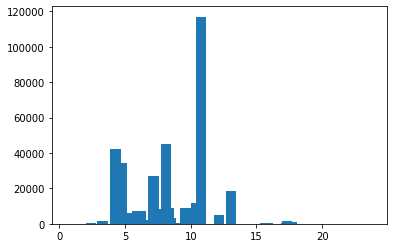

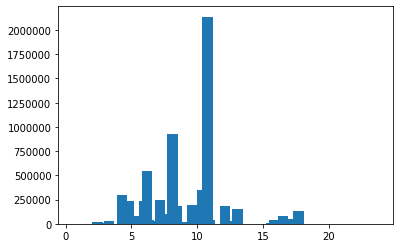

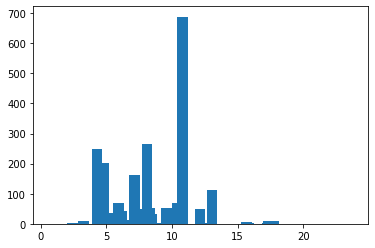

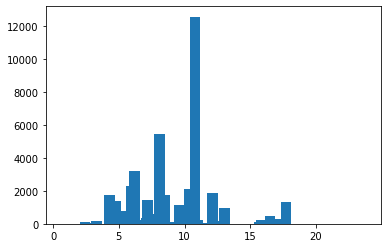

In [91]:
def plotMaps(x):
#     plt.scatter(x,newDataFrame["new_deaths"])
#     plt.show()


#     plt.scatter(x,newDataFrame["new_cases"])
#     plt.show()


#     print(x)
#     mean_train = x.mean(axis = 0)
#     std_dev_train = x.std(axis = 0)

#     x = (x - mean_train)/std_dev_train
#     x = (x - mean_train)/std_dev_train
#     print(x)

    plt.bar(x,newDataFrame["new_deaths"])
    plt.show()

    plt.bar(x,newDataFrame["new_cases"])
    plt.show()
    
    plt.bar(x,newDataFrame["AverageDeathRate"])
    plt.show()

    plt.bar(x,newDataFrame["AverageInfectionRate"])
    plt.show()

    
plotMaps(newDataFrame["diabetes_prevalence"])

In [86]:
# newDataFrame.to_csv("AggregatedData.csv")
print(newDataFrame.isnull().sum())
newDataFrame = newDataFrame.drop(columns=['handwashing_facilities'])
newDataFrame = newDataFrame.drop(columns=['female_smokers'])
newDataFrame = newDataFrame.drop(columns=['male_smokers'])
newDataFrame = newDataFrame.drop(columns=['extreme_poverty'])
newDataFrame.fillna(method='ffill', inplace=True)
newDataFrame.fillna(0,inplace=True)

newDataFrame.isnull().sum()


new_cases                       0
new_deaths                      0
stringency_index               38
population                      0
population_density             11
median_age                     24
aged_65_older                  27
aged_70_older                  25
gdp_per_capita                 27
extreme_poverty                89
cvd_death_rate                 25
diabetes_prevalence            17
female_smokers                 70
male_smokers                   72
handwashing_facilities        119
hospital_beds_per_thousand     46
DaysTotal_Days                  0
AverageInfectionRate            1
AverageDeathRate                1
dtype: int64


new_cases                     0
new_deaths                    0
stringency_index              0
population                    0
population_density            0
median_age                    0
aged_65_older                 0
aged_70_older                 0
gdp_per_capita                0
cvd_death_rate                0
diabetes_prevalence           0
hospital_beds_per_thousand    0
DaysTotal_Days                0
AverageInfectionRate          0
AverageDeathRate              0
dtype: int64

In [87]:
newDataFrame

,new_cases,new_deaths,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cvd_death_rate,diabetes_prevalence,hospital_beds_per_thousand,DaysTotal_Days,AverageInfectionRate,AverageDeathRate
location,,,,,,,,,,,,,,,
Afghanistan,26310.0,491.0,44.956867,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.50,160,164.437500,3.068750
Albania,1672.0,37.0,81.544747,2877800.0,104.871,38.0,13.188,8.643,11803.431,304.195,10.08,2.89,101,16.554455,0.366337
Algeria,11147.0,788.0,46.875000,43851043.0,17.348,29.1,6.211,3.857,13913.839,278.364,6.73,1.90,165,67.557576,4.775758
Andorra,854.0,52.0,47.253667,77265.0,163.755,29.1,6.211,3.857,13913.839,109.135,7.97,1.90,96,8.895833,0.541667
Angola,142.0,6.0,78.319770,32866268.0,23.890,16.8,2.405,1.362,5819.495,276.045,3.94,1.90,88,1.613636,0.068182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,335.0,0.0,51.593533,97338583.0,308.127,32.6,7.150,4.718,6171.884,245.465,6.00,2.60,170,2.018072,0.000000
Western Sahara,23.0,1.0,51.593533,597330.0,308.127,28.4,7.150,1.380,6171.884,245.465,6.00,2.60,53,0.433962,0.018868
Yemen,889.0,215.0,51.665000,29825968.0,53.508,20.3,2.922,1.583,1479.147,495.003,5.35,0.70,69,12.884058,3.115942


In [14]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


requiredData = newDataFrame.loc[:, newDataFrame.columns.intersection(["DaysTotal_Days" ,"new_cases","stringency_index"])]
# requiredData = newDataFrame.drop(columns=['AverageInfectionRate'])
# requiredData = requiredData.drop(columns=['AverageDeathRate'])


X = requiredData.drop(columns=['new_cases'])
y = requiredData.loc[:, requiredData.columns.intersection(["new_cases"])]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

mean_train = X_train.mean(axis = 0)
std_dev_train = X_train.std(axis = 0)
std_dev_test = X_test.std(axis = 0)

X_train = (X_train - mean_train)/std_dev_train
X_test = (X_test - mean_train)/std_dev_test


mean_train = y_train.mean(axis = 0)
std_dev_train = y_train.std(axis = 0)
std_dev_test = y_test.std(axis = 0)

y_train = (y_train - mean_train)/std_dev_train
y_test = (y_test  - mean_train)/std_dev_test

# X_train["location"] = ohe.transform(categories).todense() 


from keras.models import Sequential
from keras.layers import Dense

in_shape = X_train.iloc[0].shape
model = Sequential()
# model.add(Dense(4, activation = 'relu', input_shape = in_shape))
# model.add(Dense(4, activation = 'relu', input_shape = in_shape))
# model.add(Dense(1, activation = 'linear'))
model.add(Dense(12, activation = 'relu', input_shape = in_shape))
model.add(Dense(1, activation = 'linear'))

model.summary()



model.compile(optimizer = 'sgd', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 500, batch_size = 1, validation_split = 0.2, verbose = 1)
model.evaluate(X_test, y_test)


Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                36        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
Train on 112 samples, validate on 28 samples
Epoch 1/500
112/112 [==============================] - 0s 1ms/step - loss: 1.2842 - val_loss: 0.2867
Epoch 2/500
112/112 [==============================] - 0s 893us/step - loss: 1.1579 - val_loss: 0.2715
Epoch 3/500
112/112 [==============================] - 0s 714us/step - loss: 1.1627 - val_loss: 0.2377
Epoch 4/500
112/112 [==============================] - 0s 802us/step - loss: 1.1436 - val_loss: 0.2293
Epoch 5/500
112/112 [==============================] - ETA: 0s - 

0.9245880740029472

In [29]:
newDataFrame

,new_cases,new_deaths,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cvd_death_rate,diabetes_prevalence,hospital_beds_per_thousand,DaysTotal_Days,AverageInfectionRate,AverageDeathRate
location,,,,,,,,,,,,,,,
Afghanistan,26310.0,491.0,44.956867,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.50,160,164.437500,3.068750
Albania,1672.0,37.0,81.544747,2877800.0,104.871,38.0,13.188,8.643,11803.431,304.195,10.08,2.89,101,16.554455,0.366337
Algeria,11147.0,788.0,46.875000,43851043.0,17.348,29.1,6.211,3.857,13913.839,278.364,6.73,1.90,165,67.557576,4.775758
Andorra,854.0,52.0,47.253667,77265.0,163.755,29.1,6.211,3.857,13913.839,109.135,7.97,1.90,96,8.895833,0.541667
Angola,142.0,6.0,78.319770,32866268.0,23.890,16.8,2.405,1.362,5819.495,276.045,3.94,1.90,88,1.613636,0.068182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,335.0,0.0,51.593533,97338583.0,308.127,32.6,7.150,4.718,6171.884,245.465,6.00,2.60,170,2.018072,0.000000
Western Sahara,23.0,1.0,51.593533,597330.0,308.127,28.4,7.150,1.380,6171.884,245.465,6.00,2.60,53,0.433962,0.018868
Yemen,889.0,215.0,51.665000,29825968.0,53.508,20.3,2.922,1.583,1479.147,495.003,5.35,0.70,69,12.884058,3.115942


In [94]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


requiredData = newDataFrame.loc[:, newDataFrame.columns.intersection(["DaysTotal_Days" ,"new_deaths", "hospital_beds_per_thousand","diabetes_prevalence","median_age"])]
# requiredData = newDataFrame.drop(columns=['AverageInfectionRate'])
# requiredData = requiredData.drop(columns=['AverageDeathRate'])


X = requiredData.drop(columns=['new_deaths'])
y = requiredData.loc[:, requiredData.columns.intersection(["new_deaths"])]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

mean_train = X_train.mean(axis = 0)
std_dev_train = X_train.std(axis = 0)
std_dev_test = X_test.std(axis = 0)

X_train = (X_train - mean_train)/std_dev_train
X_test = (X_test - mean_train)/std_dev_test


mean_train = y_train.mean(axis = 0)
std_dev_train = y_train.std(axis = 0)
std_dev_test = y_test.std(axis = 0)

y_train = (y_train - mean_train)/std_dev_train
y_test = (y_test  - mean_train)/std_dev_test

# X_train["location"] = ohe.transform(categories).todense() 

from keras.models import Sequential
from keras.layers import Dense

in_shape = X_train.iloc[0].shape
model = Sequential()
model.add(Dense(4, activation = 'relu', input_shape = in_shape))
model.add(Dense(1, activation = 'linear'))
# model.add(Dense(12, activation = 'relu', input_shape = in_shape))
# model.add(Dense(1, activation = 'linear'))

model.summary()



model.compile(optimizer = 'sgd', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 500, batch_size = 1, validation_split = 0.2, verbose = 1)
model.evaluate(X_test, y_test)


Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 4)                 8         
_________________________________________________________________
dense_99 (Dense)             (None, 1)                 5         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
Train on 112 samples, validate on 28 samples
Epoch 1/500
112/112 [==============================] - 0s 2ms/step - loss: 1.2635 - val_loss: 0.1976
Epoch 2/500
112/112 [==============================] - 0s 1ms/step - loss: 1.2141 - val_loss: 0.2113
Epoch 3/500
112/112 [==============================] - 0s 1ms/step - loss: 1.2012 - val_loss: 0.1923
Epoch 4/500
112/112 [==============================] - 0s 1ms/step - loss: 1.2109 - val_loss: 0.2218
Epoch 5/500
112/112 [==============================] - 0s 1ms/step - l

0.9581789987427848

In [150]:
Pakistan = dataFrame[dataFrame.location == "Pakistan"]
Pakistan = Pakistan.loc[:, Pakistan.columns.intersection(["date" ,"new_deaths","stringency_index"])]
Pakistan.set_index('date', inplace=True)
Pakistan

X = Pakistan.drop(columns=['new_deaths'])
y = Pakistan.loc[:, Pakistan.columns.intersection(["new_deaths"])]

x=len(Pakistan)-5
train=Pakistan.iloc[:x]
test = Pakistan.iloc[x:]

from keras.models import Model
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import Dense, Embedding, LSTM, Input
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)

scaled_train = scaler.transform(train)#and divide every point by max value
scaled_test = scaler.transform(test)


n_input = 5  ## number of steps
n_features = 2 ## number of features you want to predict (for univariate time series n_features=1)
in_shape = X_train.iloc[0].shape

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation

model = Sequential()
model.add(LSTM(150,activation="relu",input_shape=(n_input,n_features)))
#model.add(Dropout(0.2))
model.add(Dense(75, activation='relu'))
model.add(Dense(units=2))
#model.add(Activation('softmax'))
#model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")
model.summary()

model.fit(X, y, epochs=200, verbose=1)


ValueError: Input 0 is incompatible with layer lstm_24: expected ndim=3, found ndim=4

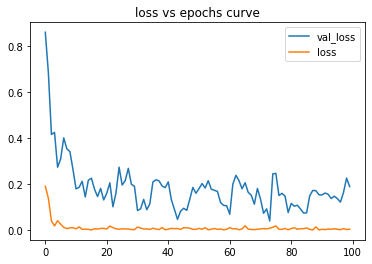

In [137]:
pd.DataFrame(model.history.history).plot(title="loss vs epochs curve")
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.33)

# # X_train = PakistanV1["Days"][0:110]
# # X_test = PakistanV1["Days"][111:]
# # y_train = PakistanV1["total_deaths"][0:110]
# # y_test = PakistanV1["total_deaths"][111:]

# X_train, y_train


# # X_train["location"] = ohe.transform(categories).todense() 


In [16]:
from keras.models import Sequential
from keras.layers import Dense

in_shape = X_train.iloc[0].shape
model = Sequential()
model.add(Dense(12, activation = 'relu', input_shape = in_shape))
model.add(Dense(1, activation = 'linear'))

model.summary()



Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                36        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [17]:
mean_train = X_train.mean(axis = 0)
std_dev_train = X_train.std(axis = 0)

X_train = (X_train - mean_train)/std_dev_train
X_test = (X_test - mean_train)/std_dev_train


mean_train = y_train.mean(axis = 0)
std_dev_train = y_train.std(axis = 0)

y_train = (y_train - mean_train)/std_dev_train
y_test = (y_test  - mean_train)/std_dev_train


In [18]:
y_train

,new_cases
location,
Kuwait,0.024153
Ecuador,0.083871
Hong Kong,-0.176763
Swaziland,-0.173936
Romania,-0.054908
...,...
Gambia,-0.176578
Saint Lucia,-0.176659
Armenia,-0.081687


In [19]:


model.compile(optimizer = 'sgd', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 500, batch_size = 1, validation_split = 0.2, verbose = 1)
model.evaluate(X_test, y_test)

Train on 112 samples, validate on 28 samples
Epoch 1/500
112/112 [==============================] - 0s 3ms/step - loss: 0.0868 - val_loss: 4.8403
Epoch 2/500
112/112 [==============================] - 0s 2ms/step - loss: 0.0461 - val_loss: 4.7122
Epoch 3/500
112/112 [==============================] - 0s 3ms/step - loss: 0.0425 - val_loss: 4.6502
Epoch 4/500
112/112 [==============================] - 0s 3ms/step - loss: 0.0415 - val_loss: 4.7767
Epoch 5/500
112/112 [==============================] - 0s 2ms/step - loss: 0.0400 - val_loss: 4.7284
Epoch 6/500
112/112 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 4.7783
Epoch 7/500
112/112 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 4.7351
Epoch 8/500
112/112 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 4.7852
Epoch 9/500
112/112 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 4.7328
Epoch 10/500
112/112 [========================

0.5730263606778213

In [20]:
## Note: Replace this with RNNs. Try RNNs. 

## Try different hidden layers. Reduce neurons and add more hiddean layers. 
    
in_shape = X_train.iloc[0].shape
model = Sequential()
model.add(Dense(12, activation = 'relu', input_shape = in_shape))
model.add(Dense(1, activation = 'linear'))


model.summary()

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 500, batch_size = 1, validation_split = 0.2, verbose = 1)
model.evaluate(X_test, y_test)




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                36        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 13        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
Train on 112 samples, validate on 28 samples
Epoch 1/500
112/112 [==============================] - 1s 6ms/step - loss: 0.1019 - val_loss: 4.9332
Epoch 2/500
112/112 [==============================] - 0s 4ms/step - loss: 0.0621 - val_loss: 4.8265
Epoch 3/500
112/112 [==============================] - 0s 3ms/step - loss: 0.0505 - val_loss: 4.7962
Epoch 4/500
112/112 [==============================] - 0s 2ms/step - loss: 0.0442 - val_loss: 4.7605
Epoch 5/500
112/112 [==============================] - 0s 2ms/step - lo

0.5931160931076322

In [21]:

in_shape = X_train.iloc[0].shape
model = Sequential()
model.add(Dense(12, activation = 'relu', input_shape = in_shape))
model.add(Dense(1, activation = 'linear'))

model.summary()

model.compile(optimizer = 'adamax', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 500, batch_size = 1, validation_split = 0.2, verbose = 1)
model.evaluate(X_test, y_test)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 12)                36        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 13        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
Train on 112 samples, validate on 28 samples
Epoch 1/500
112/112 [==============================] - 0s 2ms/step - loss: 0.0630 - val_loss: 4.8834
Epoch 2/500
112/112 [==============================] - 0s 2ms/step - loss: 0.0469 - val_loss: 4.8470
Epoch 3/500
112/112 [==============================] - 0s 3ms/step - loss: 0.0436 - val_loss: 4.8212
Epoch 4/500
112/112 [==============================] - 0s 3ms/step - loss: 0.0417 - val_loss: 4.8010
Epoch 5/500
112/112 [==============================] - 0s 3ms/step - lo

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.163864). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


112/112 [==============================] - 1s 6ms/step - loss: 0.0336 - val_loss: 4.8333
Epoch 331/500
112/112 [==============================] - 0s 3ms/step - loss: 0.0335 - val_loss: 4.8193
Epoch 332/500
112/112 [==============================] - 0s 3ms/step - loss: 0.0337 - val_loss: 4.8250
Epoch 333/500
112/112 [==============================] - 0s 2ms/step - loss: 0.0337 - val_loss: 4.8237
Epoch 334/500
112/112 [==============================] - 0s 3ms/step - loss: 0.0334 - val_loss: 4.8263
Epoch 335/500
112/112 [==============================] - 0s 3ms/step - loss: 0.0337 - val_loss: 4.8225
Epoch 336/500
112/112 [==============================] - 0s 3ms/step - loss: 0.0337 - val_loss: 4.8173
Epoch 337/500
112/112 [==============================] - 0s 2ms/step - loss: 0.0337 - val_loss: 4.8221
Epoch 338/500
112/112 [==============================] - 0s 3ms/step - loss: 0.0335 - val_loss: 4.8258
Epoch 339/500
112/112 [==============================] - 0s 3ms/step - loss: 0.0336 - v

0.5937402169619288

In [67]:

X_train
Z = [0.5, 1]
X_train.iloc[0]
X = model.predict(X_train[0:1])


# denormalized_d = X[0][0] * (max_d - min_d) + min_d

llist = requiredData.new_cases.tolist()

denormalized_d = X[0][0] * (max(llist) - min(llist)) + min(llist)



(      location        date  new_cases  new_deaths  stringency_index  \
 12170   Kuwait  2019-12-31        0.0         0.0               0.0   
 12171   Kuwait  2020-01-01        0.0         0.0               0.0   
 12172   Kuwait  2020-01-02        0.0         0.0               0.0   
 12173   Kuwait  2020-01-03        0.0         0.0               0.0   
 12174   Kuwait  2020-01-04        0.0         0.0               0.0   
 ...        ...         ...        ...         ...               ...   
 12332   Kuwait  2020-06-13      520.0         6.0               0.0   
 12333   Kuwait  2020-06-14      514.0         4.0               0.0   
 12334   Kuwait  2020-06-15      454.0         7.0               0.0   
 12335   Kuwait  2020-06-16      511.0         2.0               0.0   
 12336   Kuwait  2020-06-17      527.0         5.0               0.0   
 
        population  population_density  median_age  aged_65_older  \
 12170   4270563.0             232.128        33.7          2.345